# Project: Wrangling and Analyze Data

## Data Gathering



In [125]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import time

In [140]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
df.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.status_code

200

In [19]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [20]:
r.encoding

'utf-8'

In [4]:
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(r.content)
    
#creating dataframe out of tsv file

image_df = pd.read_csv('image-predictions.tsv',sep='\t')
image_df.set_index('tweet_id')


,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
consumer_key = '**********'
consumer_secret = '*****'
access_token = '******'
access_secret = '*******'

In [8]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
#https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy

df_list = []

with open('tweet-json.txt', 'r',encoding='utf-8-sig',errors='ignore') as file:

    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweeted = tweet['retweet_count']
        favorited = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        date_time = tweet['created_at']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweeted,
                        'favorite_count': favorited,
                        'user_count': user_count,
                        'date_time': pd.to_datetime(date_time)})
api_df = pd.DataFrame(df_list)
api_df.sample(10)

,date_time,favorite_count,retweet_count,tweet_id,user_count
151,2017-05-11 17:34:13,17779,3809,862722525377298433,3200891
32,2017-07-14 22:10:11,33382,7097,885984800019947520,3200890
1600,2016-01-09 23:55:38,2326,611,685973236358713344,3200950
2094,2015-11-29 00:06:39,475,123,670755717859713024,3201008
1056,2016-06-12 00:44:30,4982,1698,741793263812808706,3200943
1231,2016-03-24 01:11:29,20378,7602,712809025985978368,3200947
2065,2015-11-30 01:39:49,1246,713,671141549288370177,3201008
990,2016-07-01 01:40:41,4659,1504,748692773788876800,3200851
1242,2016-03-21 02:38:34,3095,1101,711743778164514816,3200947
1929,2015-12-08 01:21:40,906,240,674036086168010753,3201004


## Assessing Data

First step of the data wrangling process is to visually assesing the data. In order to do so, I will expand the 'twitter-archive-enhanced-2.csv' file.




In [12]:
df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [21]:
df.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [18]:
df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Buddy         7
an            7
Bailey        7
Toby          7
Daisy         7
Oscar         6
Rusty         6
Bella         6
Scout         6
Jack          6
Dave          6
Milo          6
Leo           6
Koda          6
Jax           6
Stanley       6
Oakley        5
           ... 
Glenn         1
Tripp         1
Maya          1
Cannon        1
Mairi         1
Stark         1
Lassie        1
Loomis        1
Arlo          1
Batdog        1
Rueben        1
Bradley       1
Nico          1
Cecil         1
Hermione      1
Maude         1
Clarkus       1
Molly         1
Godzilla      1
Mya           1
Franq         1
Remus         1
Anthony       1
Shikha        1
Sparky        1
Rufio         1
Kaia          1
Lilli         1
Adele         1
Grizzie       1
Name: name, Length: 957,

In [39]:
# explore data with name a
df.loc[df['name'] =='a']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [40]:
# explore data with name an
df.loc[df['name'] =='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


### Quality issues
1.Extra characters after '&'

2.Tweet with more than one #/# sometimes have the first occurence erroneously used for the rating numerators and denominators

3.Tweet_ids being integers

4.Incorrect dog names

5.Dataset contains retweets

6.Sources difficult to read

7.Inconsistent naming. Empty name cells account for 755 and meaningless names such as 'a' and 'an'.

8.Tweets with no images

### Tidiness issues
1. Dog types can be re-arranged under dog_kind column

2. tweet info and image info can be joined together

## Cleaning Data
In this section, data will be cleaned **all** of the issues documented while assessing. 


In [10]:
# Make copies of original pieces of data
df_clean = df.copy()

In [11]:
image_clean = image_df.copy()

In [12]:
tweet_clean = api_df.copy()

### Issue #1:

#### Define: Dog types can be rearranged under the dog_kind column

#### Code

In [13]:
df_clean = pd.melt(df_clean,
                  id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'],
                  value_vars = ['doggo','floofer','pupper','puppo'],
                  var_name='dog_kinds',
                  value_name='doogies')


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


#### Test

In [35]:
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_kinds,doogies
3160,772117678702071809,NaN,NaN,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772117678...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,floofer,None
4765,881906580714921986,NaN,NaN,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881906580...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pupper,None
2840,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,floofer,None
8984,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,puppo,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,None
1187,718460005985447936,NaN,NaN,2016-04-08 15:26:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718460005...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,None
8690,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684914660...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,puppo,None
7691,796031486298386433,NaN,NaN,2016-11-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's here to make your day bet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796031486...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,puppo,None
1101,735635087207878657,NaN,NaN,2016-05-26 00:54:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He hasn't grow into his skin y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735635087...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,None
7469,824663926340194305,NaN,NaN,2017-01-26 17:02:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. Named after the volleyball. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824663926...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,puppo,None


### Issue #2:

#### Define : tweet info and image info can be joined together

#### Code

In [14]:
# merge tweet_clean and df_clean
twttr_clean = pd.merge(tweet_clean, df_clean ,on='tweet_id')
twttr_clean.set_index('tweet_id')
twttr_clean.head(3)

,date_time,favorite_count,retweet_count,tweet_id,user_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_kinds,doogies
0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,None
1,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,floofer,None
2,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pupper,None


#### Test

In [15]:
twttr_clean.columns

Index(['date_time', 'favorite_count', 'retweet_count', 'tweet_id',
       'user_count', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_kinds', 'doogies'],
      dtype='object')

In [16]:
# merge twttr_clean and image_clean
twttr_clean_final = pd.merge(twttr_clean, image_clean ,on='tweet_id')
twttr_clean_final.set_index('tweet_id')
twttr_clean_final.head(3)

,date_time,favorite_count,retweet_count,tweet_id,user_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,...,img_num_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
1,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
2,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [33]:
twttr_clean_final.columns

Index(['date_time', 'favorite_count', 'retweet_count', 'tweet_id',
       'user_count', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'jpg_url_x', 'img_num_x', 'p1_x', 'p1_conf_x',
       'p1_dog_x', 'p2_x', 'p2_conf_x', 'p2_dog_x', 'p3_x', 'p3_conf_x',
       'p3_dog_x', 'dog_kinds', 'doogies', 'jpg_url_y', 'img_num_y', 'p1_y',
       'p1_conf_y', 'p1_dog_y', 'p2_y', 'p2_conf_y', 'p2_dog_y', 'p3_y',
       'p3_conf_y', 'p3_dog_y'],
      dtype='object')

## Storing Data


In [27]:
# Save clean DataFrame to csv file
twttr_clean_final.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data


In [28]:
df_latest = pd.read_csv('twitter_archive_master.csv')

In [213]:
df_latest.head(10)

,Unnamed: 0,date_time,favorite_count,retweet_count,tweet_id,user_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,...,img_num_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,2,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
3,3,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,4,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
5,5,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
6,6,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
7,7,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
8,8,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
9,9,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [29]:
df_latest.columns

Index(['Unnamed: 0', 'date_time', 'favorite_count', 'retweet_count',
       'tweet_id', 'user_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweets', 'favorites', 'jpg_url_x',
       'img_num_x', 'p1_x', 'p1_conf_x', 'p1_dog_x', 'p2_x', 'p2_conf_x',
       'p2_dog_x', 'p3_x', 'p3_conf_x', 'p3_dog_x', 'dog_kinds', 'doogies',
       'jpg_url_y', 'img_num_y', 'p1_y', 'p1_conf_y', 'p1_dog_y', 'p2_y',
       'p2_conf_y', 'p2_dog_y', 'p3_y', 'p3_conf_y', 'p3_dog_y'],
      dtype='object')

### Insights:

1. **Favorited vs ReTweeted tweets :** There is a linear positive correlation between the retweet and favorite counts. (Please also see the visualization regarding it)

In [30]:
df_latest.corr()

,Unnamed: 0,favorite_count,retweet_count,tweet_id,user_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,...,p3_x,p3_conf_x,p3_dog_x,img_num_y,p1_conf_y,p1_dog_y,p2_conf_y,p2_dog_y,p3_conf_y,p3_dog_y
Unnamed: 0,1.000000,-0.561877,-0.392125,-0.959247,0.940315,-0.682669,NaN,-0.678585,-0.138329,-0.030225,...,NaN,NaN,NaN,-0.221693,-0.101939,-0.122126,-0.000112,-0.120629,0.046027,-0.098345
favorite_count,-0.561877,1.000000,0.790476,0.607007,-0.503319,0.595754,NaN,NaN,NaN,0.010157,...,NaN,NaN,NaN,0.132241,0.076077,0.056156,-0.022787,0.060114,-0.053427,0.043928
retweet_count,-0.392125,0.790476,1.000000,0.404702,-0.366378,0.167515,NaN,0.063119,-0.097053,0.012787,...,NaN,NaN,NaN,0.105534,0.044739,0.006092,-0.008619,0.017197,-0.035511,0.006140
tweet_id,-0.959247,0.607007,0.404702,1.000000,-0.869193,0.685117,NaN,0.771317,0.189739,0.023103,...,NaN,NaN,NaN,0.205455,0.101283,0.111304,0.003047,0.112607,-0.042979,0.087844
user_count,0.940315,-0.503319,-0.366378,-0.869193,1.000000,-0.572201,NaN,-0.412656,-0.052104,-0.020781,...,NaN,NaN,NaN,-0.209110,-0.078769,-0.119247,-0.013615,-0.118816,0.029591,-0.096398
in_reply_to_status_id,-0.682669,0.595754,0.167515,0.685117,-0.572201,1.000000,NaN,NaN,NaN,-0.078811,...,NaN,NaN,NaN,0.076881,0.425057,-0.079810,-0.392543,-0.210564,-0.341782,0.133557
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_id,-0.678585,NaN,0.063119,0.771317,-0.412656,NaN,NaN,1.000000,0.191149,0.448821,...,NaN,NaN,NaN,0.029031,-0.035814,-0.113202,0.000088,-0.150683,0.023816,-0.188520
retweeted_status_user_id,-0.138329,NaN,-0.097053,0.189739,-0.052104,NaN,NaN,0.191149,1.000000,0.089762,...,NaN,NaN,NaN,-0.041417,-0.115273,0.077042,0.079805,0.070344,0.109952,0.081589
rating_numerator,-0.030225,0.010157,0.012787,0.023103,-0.020781,-0.078811,NaN,0.448821,0.089762,1.000000,...,NaN,NaN,NaN,-0.000405,-0.009143,-0.028515,-0.020317,-0.033740,-0.003887,-0.028497



2. **Distribution of the tweets by week days :**  As it can be seen from the below table and the graph there is not a very meaningful changes on the tweets. I guess the only meaningful conclusion we can reach is that there are less tweets on the weekends

In [202]:
#We have to copy df to another file
df_time = df_latest.copy()


df_time = df_time[['timestamp']]

df_time['timestamp'] = pd.to_datetime(df_time['timestamp'])

df_time['week_day'] = df_time['timestamp'].dt.day_name()

#df_time

df_time_mean = df_time['week_day'].value_counts() #calculating the mean for the ratings


# # Setting strings as index (preparing to the plot).
df_time_mean.index = (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


df_time_mean.index.name='Week Day'
df_time_mean.column ='Tweets Number'


df_time_mean

Week Day
Monday       1356
Tuesday      1252
Wednesday    1244
Thursday     1180
Friday       1164
Saturday     1048
Sunday       1048
Name: week_day, dtype: int64

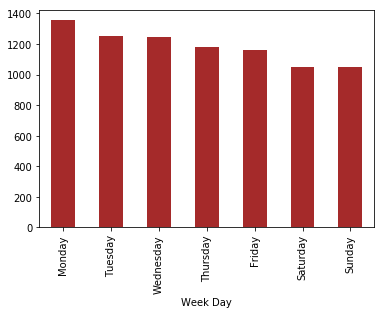

In [212]:
# Plotting Average Rating over the weekdays.
df_time_mean.plot.bar(y = 'Tweet Numbers', color= 'brown');

In [190]:
# from dateutil.parser import parse

# df_time_mean['weekday'] = df_time['timestamp'].apply(lambda x: parse(str(x)).strftime("%A"))


3. **Which dog breed gets the most attention :** Golden retriever by far the most favourited dog breed.     

In [227]:
df_breed = df_latest.copy()


favs_by_breed = df_breed.groupby(['p1_y'])['favorite_count'].sum().sort_values(ascending = False)
favs_by_breed

most_favourited = favs_by_breed.head(10)

most_favourited



p1_y
golden_retriever      6786508
Labrador_retriever    4495400
Pembroke              3979020
Chihuahua             2705764
Samoyed               2171964
French_bulldog        1862952
chow                  1616964
pug                   1280892
cocker_spaniel        1263300
Pomeranian            1196456
Name: favorite_count, dtype: int64

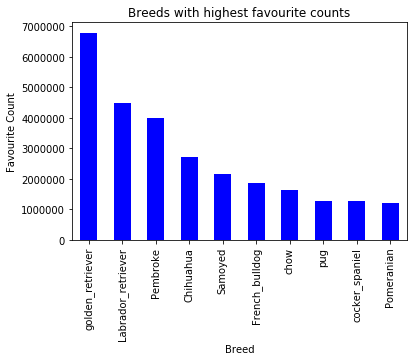

In [233]:
# setup the bar chart
most_favourited.plot(kind = 'bar', color = 'blue')
plt.title('Breeds with highest favourite counts')
plt.xlabel('Breed')
plt.ylabel('Favourite Count');

### Visualization

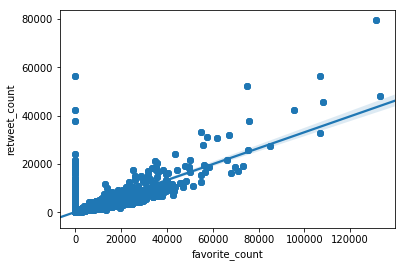

In [221]:
import seaborn as sb 
import matplotlib.pyplot as plt

sb.regplot(x = 'favorite_count', y = 'retweet_count', data= df_latest)


plt.show()


There is a positive correlation between the favorited and retweeted tweets as per the scatterplot.